In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [9]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")

data_valid = data[-90:].copy()
data = data[:-90].copy()
data = data.drop(['date'], axis=1).copy()

y = data['btc_vwap_org'].copy()
X = data.drop(['btc_vwap', "btc_vwap_org"], axis=1)

valid_y = data_valid['btc_vwap_org'].copy()
valid_X = data_valid.drop(['btc_vwap', 'btc_vwap_org', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Lists for the comparison of model results.
rmse = dict
mape = dict

rmse_scores = []
mae_scores = []
mape_scores = []


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

### Linear Regression

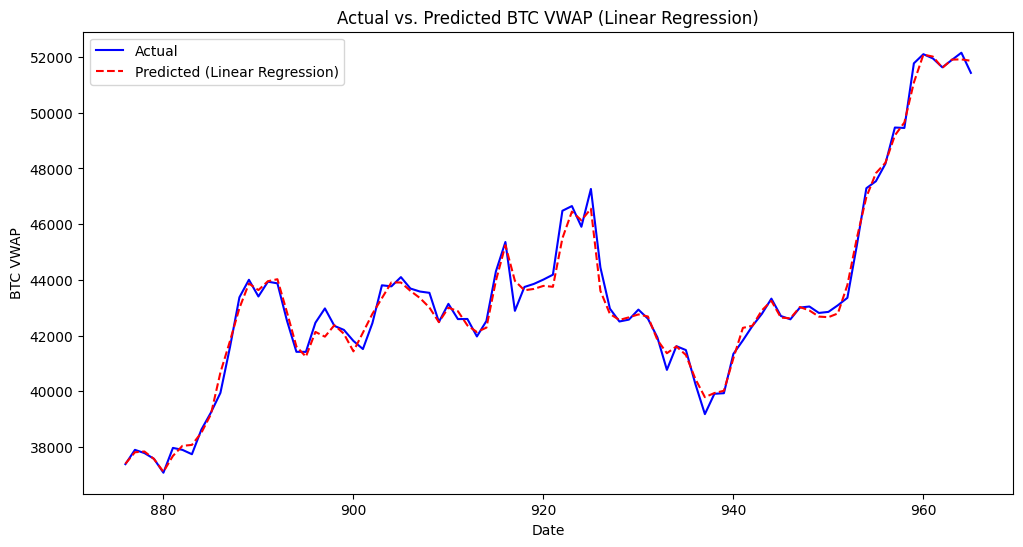

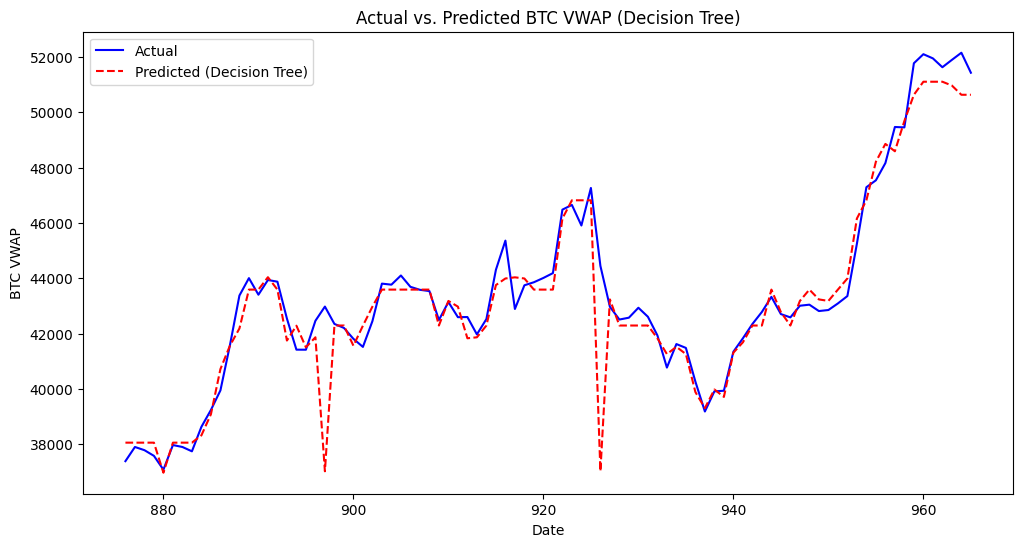

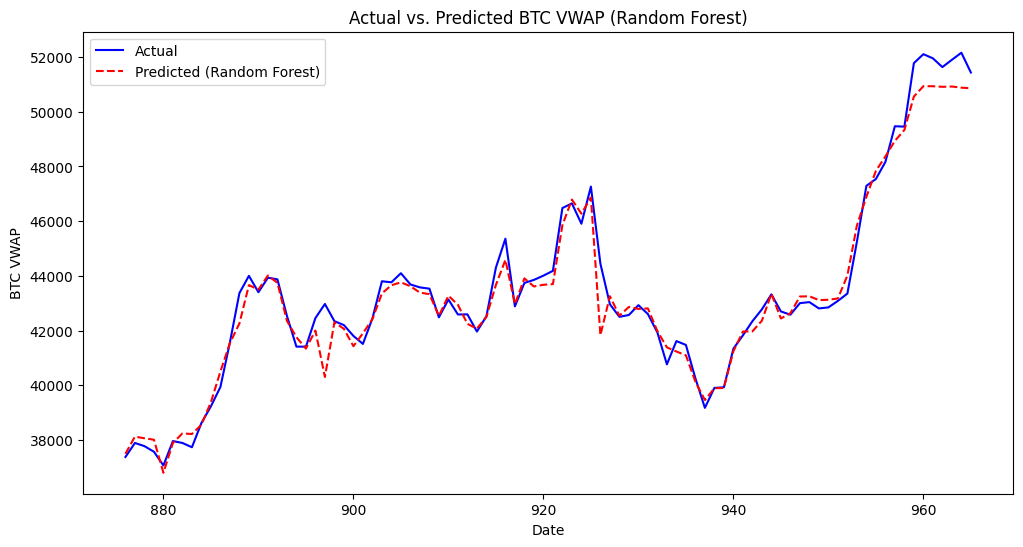

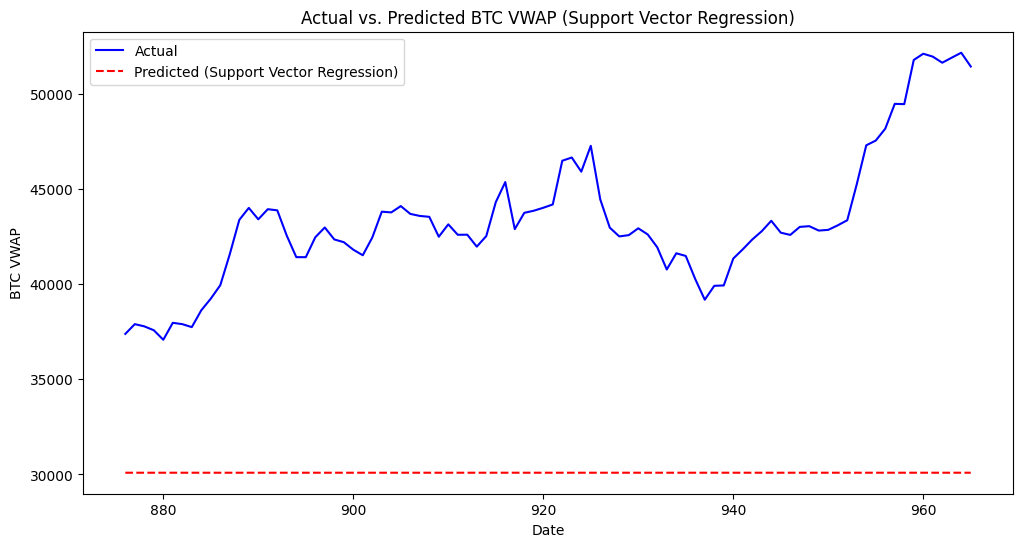

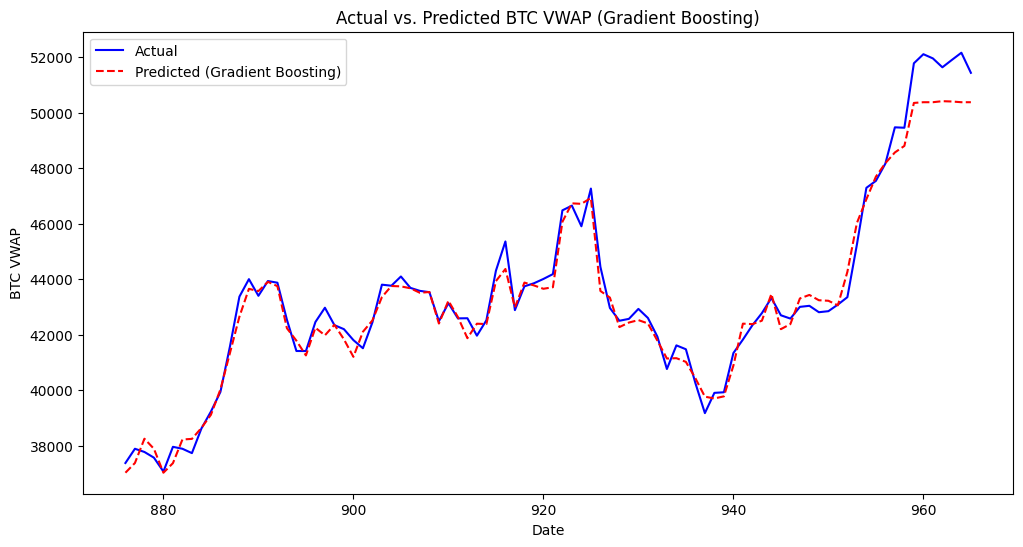

/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


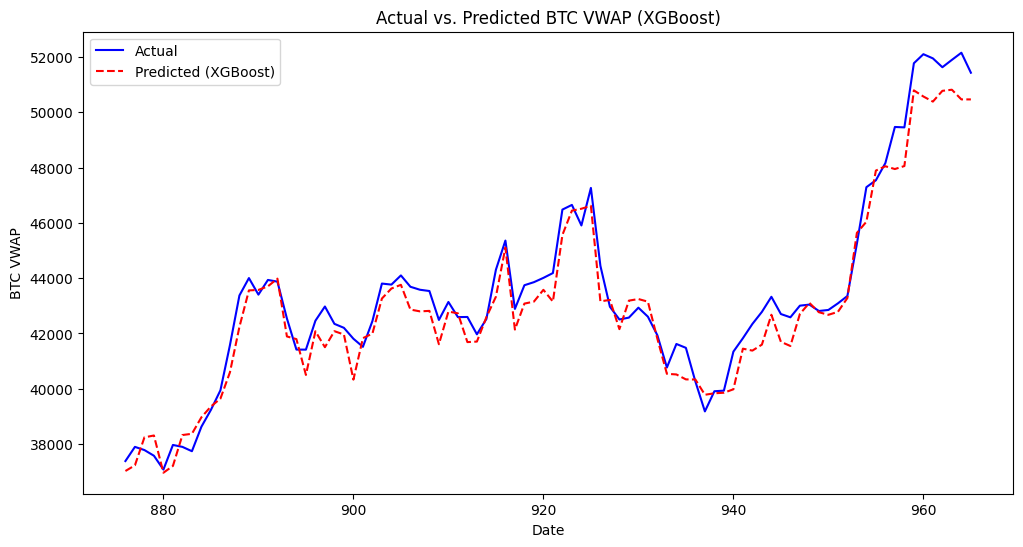

/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


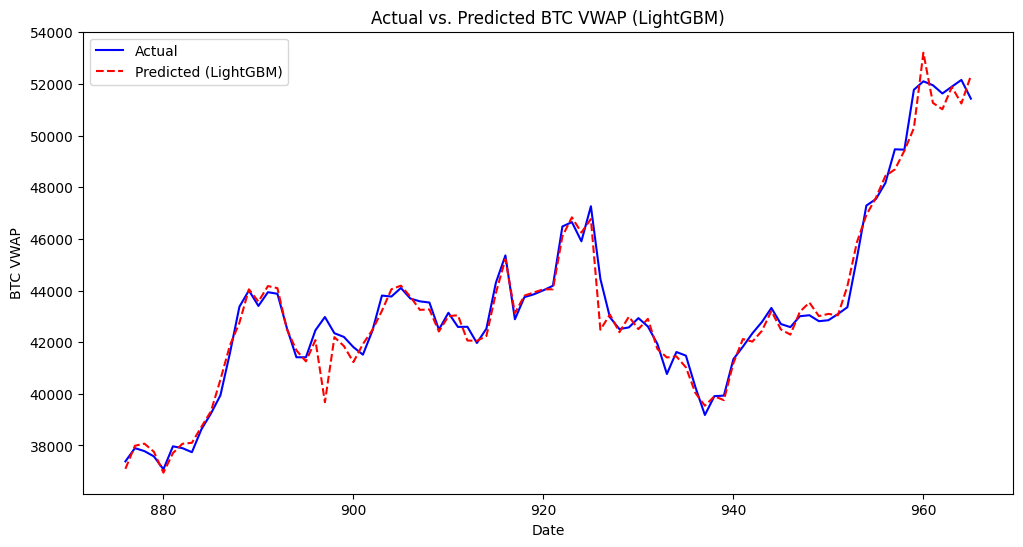

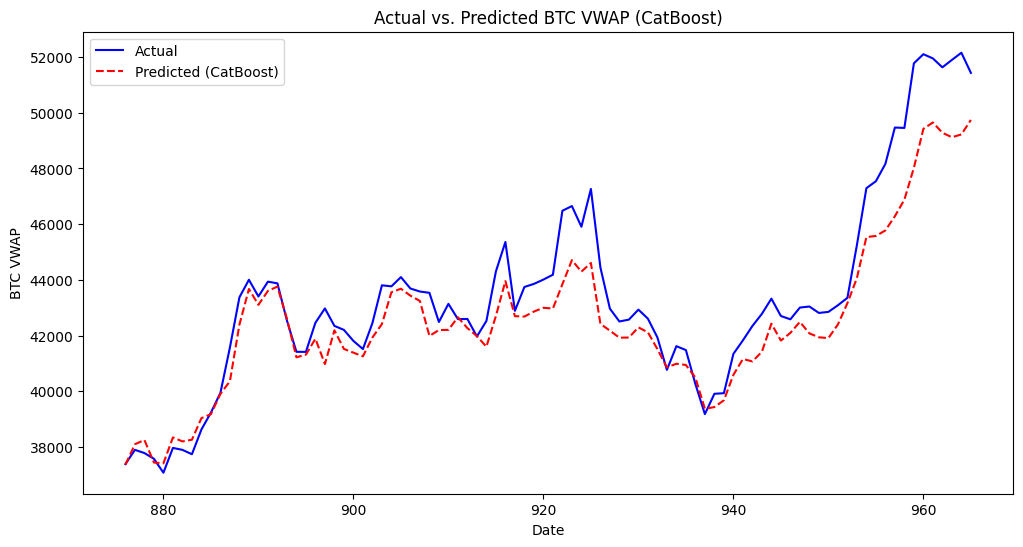

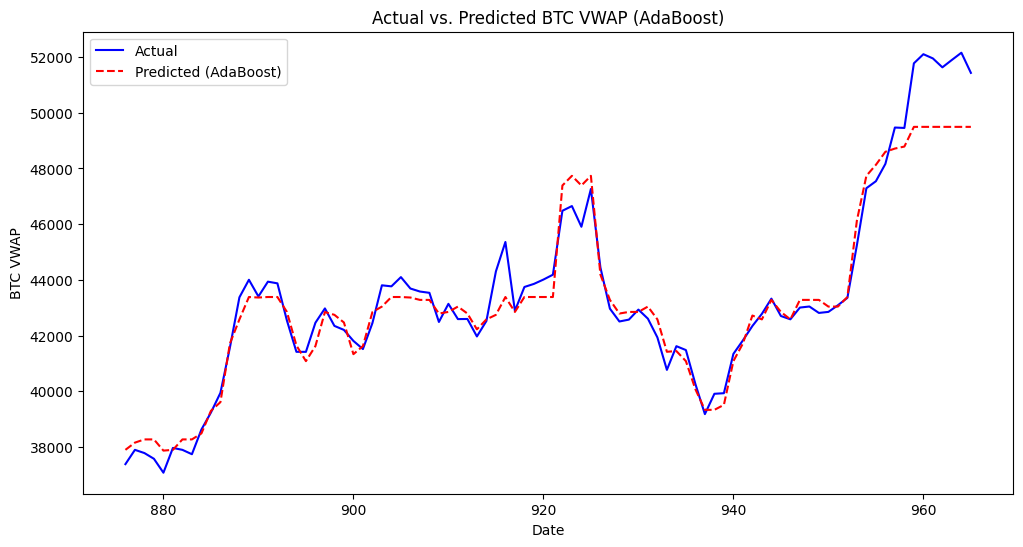

RMSE Scores:
Linear Regression: 338.0700450981946
Decision Tree: 1135.7673995560858
Random Forest: 580.7266197936285
Support Vector Regression: 13713.718878762533
Gradient Boosting: 576.9645272458602
XGBoost: 754.9978867354675
LightGBM: 568.4453079464571
CatBoost: 1267.5661648875
AdaBoost: 844.2808197377525

MAE Scores:
Linear Regression: 244.1980829335159
Decision Tree: 559.2635883450267
Random Forest: 375.5764170591902
Support Vector Regression: 13257.737017468893
Gradient Boosting: 419.898583422543
XGBoost: 618.8752730378596
LightGBM: 361.8447537917169
CatBoost: 935.6454339784142
AdaBoost: 577.3967485432279


In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

for model_name, model in models.items():
    # XGBoost, LightGBM ve CatBoost modelleri için ayrıca belirli parametreleri kontrol etmek gerekebilir.
    if 'XGBoost' in model_name:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'LightGBM' in model_name:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'CatBoost' in model_name:
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    else:
        model.fit(X_train, y_train)
    
    # Tahminler yapma
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_valid = model.predict(valid_X)

    # RMSE ve MAE hesaplamaları
    rmse = np.sqrt(mean_squared_error(valid_y, y_pred_valid))
    mae = mean_absolute_error(valid_y, y_pred_valid)

    # Skorları listelere ekleme
    rmse_scores.append((model_name, rmse))
    mae_scores.append((model_name, mae))

    # Tahminlerin gerçek değerlerle karşılaştırılması için grafikleştirme
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
    plt.plot(data.index[-len(valid_y):], y_pred_valid, label=f'Predicted ({model_name})', linestyle='dashed', color='red')
    plt.title(f'Actual vs. Predicted BTC VWAP ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('BTC VWAP')
    plt.legend()
    plt.show()

print("RMSE Scores:")
for model_name, rmse in rmse_scores:
    print(f"{model_name}: {rmse}")

print("\nMAE Scores:")
for model_name, mae in mae_scores:
    print(f"{model_name}: {mae}")


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

X = np.array(X)
y = np.array(y)

X_train, X_test = X[:-90], X[-90:]
y_train, y_test = y[:-90], y[-90:]

# Veriyi uygun şekilde yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=(30 ,1)),
    SimpleRNN(20),
    Dense(10),
    compile(optimize="adam", loss="mse")
])

# SimpleRNN modeli oluşturma
# model = Sequential()
# model.add(SimpleRNN(50, input_shape=(30, 1), activation='relu'))  # Burada zaman serisi uzunluğunu (30) belirledik
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Tahmin yapma
y_pred = model.predict(X_test)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted (SimpleRNN)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

TypeError: compile() missing required argument 'source' (pos 1)